In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("C:/Users/19452/Downloads/Air_line_Delay_Cause.csv")

# Data Preprocessing: Convert categorical variables to numeric
label_encoder = LabelEncoder()
df['carrier'] = label_encoder.fit_transform(df['carrier'])
df['airport'] = label_encoder.fit_transform(df['airport'])

# Fill any missing values with zero
df.fillna(0, inplace=True)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("C:/Users/19452/Downloads/Air_line_Delay_Cause.csv")

# Data Preprocessing: Convert categorical variables to numeric
df['carrier'] = df['carrier'].astype('category').cat.codes
df['airport'] = df['airport'].astype('category').cat.codes

# Fill missing values
df.fillna(0, inplace=True)

# Feature engineering: Create a cascading delay flag
df['cascading_delay'] = np.where(df['late_aircraft_ct'] > 0, 1, 0)

# Define features and target
features = ['month', 'carrier', 'airport', 'arr_flights', 'arr_cancelled', 'arr_diverted', 
            'arr_delay', 'carrier_ct', 'weather_ct', 'nas_ct','late_aircraft_ct']
#features = ['month', 'carrier', 'airport', 'arr_flights', 'arr_delay', 'late_aircraft_ct']
X = df[features]
y = df['cascading_delay']

# Balance the dataset (if needed)
df_majority = df[df['cascading_delay'] == 0]
df_minority = df[df['cascading_delay'] == 1]

df_minority_upsampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Redefine features and target for the balanced dataset
X = df_balanced[features]
y = df_balanced['cascading_delay']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred = rf_clf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Random Forest Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    201982
           1       1.00      1.00      1.00    201811

    accuracy                           1.00    403793
   macro avg       1.00      1.00      1.00    403793
weighted avg       1.00      1.00      1.00    403793


Confusion Matrix:
[[201982      0]
 [     0 201811]]


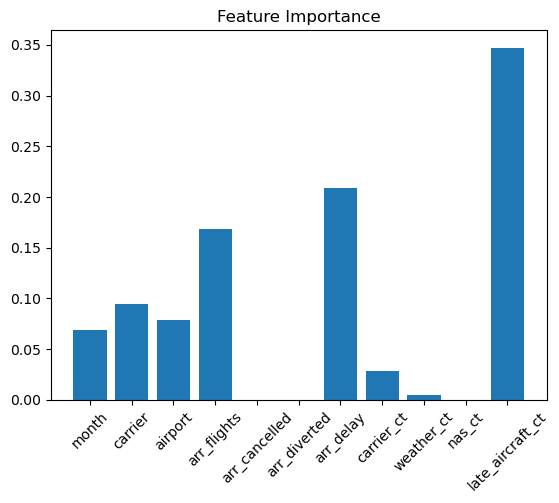

In [3]:
import matplotlib.pyplot as plt
feature_importances = rf_clf.feature_importances_
plt.bar(features, feature_importances)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()


In [5]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 1.0
